In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Introduction to Artificial Neural Networks
1. **인공신경망(ANN)** 구조 이해
2. **다층 퍼셉트론(MLPs: Multi-Layer Perceptrons)** 을 TensorFlow로 구현하고 MNIST 분류 문제를 풀어보자

### Artifcial Neural Netorks(ANNs)
> - 기원은 뇌의 구조
> - 자연을 본따는 인간의 습성이 그러하듯 
> - 하지만 창의성을 위해서는 생물학적 사고 안에서 머물러서는 안된다.
> - ANNs는 Deep Learning의 핵심이다.
> - 다재다능/강력/확장성으로 어려운 머신러닝 숙제를 잘 풀어간다. (이미지 분류, 음성인식, 추천시스템, 게임)

### From Biological to Artificial Neurons

- ANNs 는 출현한지 좀 오래된 알고리즘
 - 1943 신경생리학자 Warren McCulloch와 수학자 Walter Pitts "A Logical Calculus of Ideas Immanent in Nervous Activity"
   - **논리연산을 사용한 복잡한 계산을 수행시, 동물 두뇌에서 생물학적 뉴런이 작동하는 단순화된 계산 모델 제시** ← 최초 ann 구조
 - 이후 다른 구조들이 발명되었음


- 1960년대까지 ANN 초기 성공은 지능이 있는 기계와 대화할거라는 믿음을 이끌어냈다.
- 80년대 초반까지는 암흑기(펀딩x), 새로운 구조와 학습 기술이 개발되면서 다시 관심이 생겨남
- 90년대에는 SVM에 밀림(결과가 좋고 이론적 기초가 탄탄)
- 최근에는...
 - <font color='red'>데이터</font>가 방대함, 다른 ML 테크닉보다 크고 복잡한 문제에 성능이 더 좋음
 - 1990 년대 이후로 <font color='red'>컴퓨팅 파워(GPU, 게임 업계 덕분)</font>가 엄청나게 개선된 덕분에 합리적인 시간에 대규모 신경 네트워크를 학습 할 수 있음
 - <font color='red'>학습 알고리즘이 개선</font>되었습니다. 사실 그들은 1990 년대에 사용 된 것들과 약간만 다르지만, 이런 작은 비틀기는 엄청난 긍정적 영향을 미침
 - ANN의 이론적 한계중 일부가 현업에서 쓰기에 무리가 없음이 밝혀짐
   - **ex) ANN 교육 알고리즘이 Local 최적 상태에 머물러 있기 때문에 한계에 부딪혔다 고 생각하지만 실제로는 현업에서 그럴일이 거의 없음 
   (또는 실제로 그런 경우 일반적으로 Global 최적에 가까움).**
 - ANN은 자금 조달 및 진보의 선순환 들어갔다. 헤드라인 뉴스 제조기

### Biological Neurons
> 고차원의 복잡한 계산이 단순한 뉴론들의 Multi layers로 수행될 수 있다. Biological 뉴런 네트워크의 The architecture은 여전히 핫한 연구 주제

### Logical Computations with Neurons
(assuming that a neuron is activated when at least two of its inputs are active)
 <img src="images/book_img/ch10/10_p1.SimpleANN.png">

### The Perceptron

- 가장 간단한 ANN 구조 by 1957 Frank Rosenblatt
 - linear threshold unit(LTU) : 이진 분류에 사용 (just like a Logistic Regression classifier or a linear SVM) 
   - input&ouput: numbers (not binary on/off values)
   - 각 입력연결은 가중치와 연결된다.
   - 입력갑들의 합들을 계산하고, 그 합을 임계값을 경계로 출력하는 2단계로 처리
   

- Perceptron은 단일 LTU로 구성되어 있다.
 - input neurons
 - bias neuron
   
`"퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다"`

<img src="images/book_img/ch10/10_p2.LTU.png">

<img src="images/book_img/ch10/10_p2_2.perceptron_diagram.png">

`Heaviside Step Function(계단함수) 과 부호함수(sign function)`

<img src="images/book_img/ch10/10_p3.StepFunction.png">

- Percpetron 학습 방법
 - training algorithm은 Hebb's rule에 영감을 받은 Frank Rosenblatt 에 의해 제안됨
   - "어떤 신경세포의 활성이 다른 신경세포가 활성하는데 계속적으로 공헌을 한다면, 두 신경세포 간의 연결 가중치를 증가시켜 주어야 한다."
   __ The Organization of Behavior, 1949, Donald Hebb ☆

<img src="images/book_img/ch10/10_p4.Perceptron learning.png">

 - 각 ouput neuron 의 decision boundary 가 선형이므로, perceptron은 복잡한 패턴을 학습하는데 한계가 있다. (Logistic Regression calssifier 처럼)
- 하지만 training instances가 선형으로 분리가능하다면, 이 알고리즘이 해로 수렴함: *Percpetron convergence theorem*

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int) # Boolean -> integer

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

- Perceptron 학습 알고리즘은 Stochastic Gradient Descent와 유사하다.
- Scikit-Learn's Perceptron 클래스는 SGDClassifier 의 아래 하이퍼파라미터 설정으로 했을때 동일하다.
 - *loss = "perceptron", learning_rate="constant", eta0=1 (the learning rate), penalty = None (no regularization)* ☆

- Logistic Regression classifiers과 다르게, 각 클래스의 확률을 출력하지 않고 hard threshold에 기반한 예측만 한다.

- 퍼셉트론의 약점을 기술한 Monograph(Perceptrons, Marvin Minsky and Seymour Papert, 1969)
 - Exclusive OR(XOR) 문제 못푼다.이는 다른 선형 분류기도 마찬가지만, 많은 연구자들이 connectionism 을 포기하는 계기가 되었다.

- 이러한 한계점은 여러 Perceptrons 들을 쌓으면서 해소될 수 있다.
- 이 ANN은 Multi-Layer Perceptron(MLP)라 불린다.

<img src="images/book_img/ch10/10_p5.XOR.png">

## Multi-Layer Perceptron and Backpropagation

- MLP 는 (passthrough) input layer과, 1개 이상의 LTU (hidden layers), 마지막 ouput layer로 구성되어 있다.
 - ouput layer를 제외한 모든 레이어에 bias neuron이 있고, 다음 레이어에 fully connected 되어 있다.
 - hidden layers가 2개 이상이라면 Deep nural network(DNN)라고 불린다.

<img src="images/book_img/ch10/10_p6.MLP.png">

- 여러 해 동안 MLP를 학습시키기 위해 많은 연구자들이 성과 없이 고군분투 했다.
- <font color = red>**backpropagation** 학습 알고리즘</font>을 소개하는 "Learning Internal Represenations by Error Propagation"(1986, D.E. Rumelhar et al) 획기적인 논문이 발간되었다.
- 오늘날 우리가 이야기하는**reverse-mode autodiff를 이용한 Gradient Descent 이다.**
 > 개별 학습 instacne 마다... 모든 누적 레이어에 대해 feed forward pass 이후에 ouput error를 보고, 마지막 hidden layer의 각 뉴런이 ouput error에 얼마나 기여를 했는지 계산한다. 후에 input layer까지 각 이전 hidden layer에서 에러 기여도를 측정하는 방법
   - 이러한 reverse pass(**<font color=red>error gradient</font>를 네트워크에서 역으로 전파**함으로써)는 네트워크의 모든 연결된 weight에 대해 error gradient를 효과적으로 측정한다.
   - 역전파(backpropatation) 알고리즘의 마지막 단계는 앞에서 측정 한 오류 기울기(error gradient)를 사용하여 네트워크의 모든 연결 가중치에 대한 Gradient Descent 을 수행한다.

즉, ` "예측을 하고(forward pass), 에러를 측정하고, 개별 layer를 역으로 추적해 나가면서 각 연결의 error contribution를 계산한다(reverse pass). 그리고 에러를 줄이는 방향으로 가중치를 조정한다(Gradient Descent)." `

- 이 알고리즘이 **제대로 작동하기 위한 핵심(key change)은 step function 대신에 logistic function을 적용하는 MLP's 구조**이다.
 > logistic function이 모든 곳에서 잘정의된(0이 아닌) 미분계수를 구해주고, 이를 통해 Gradient Descent를 각 단계마다 성공적으로 진전시킬수 있다.
 > logistic function 대신에 다른 activation function을 적용할수도 있다.
   - *The hyperbolic tangent function*
    : 1~1(logistic functoin: 0 ~ 1) / normalized(helps speed up convergence)
   - *The ReLU function*
     : ReLU (z) = max(0, z): 연속적이지만 미분가능하지 않다.(기울기가 급격히 변해서 경사하강이 잘 안된다) / 실제로는 계산이 빠른 이점이 있다. 가장 중요한 것은 출력 값이 최대치가 아니기 때문에 경사하강 중 일부 문제를 줄일 수 있다는 것입니다. ☆
   
  - 생물학적 뉴런은 활성화 함수를 시그모이드(S-자) 를 구현한다. 따라서 이를 오랫동안 고수했지만, ANN에서 ReLU가 더 잘 작동하는 것이 발견되었다.

In [4]:
def logit(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

[-5, 5, -0.2, 1.2]

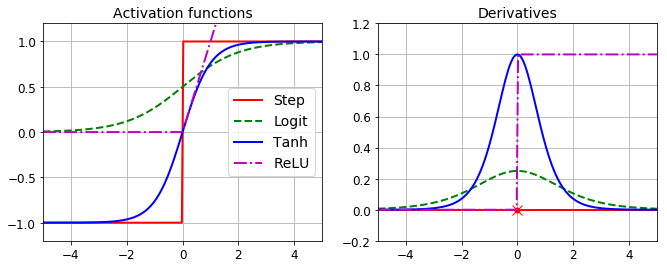

In [5]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=2, label="Step")
plt.plot(z, logit(z), "g--", linewidth=2, label="Logit")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=2, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(logit, z), "g--", linewidth=2, label="Logit")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

# save_fig("activation_functions_plot")
# plt.show()

- MLP는 이진 분류기(스팸, 긴급 알림 등)에 자주 쓰인다.
- 결과가 배타적이라면(이지 분류가 0~9까지 잇을때 등) output layer를 individual activation function 이 아닌 shared soft-max 함수를 적용하면 된다.
 - 각 뉴런의 출력은 해당 클래스의 예상 확률에 해당한다.

Note that the signal flows only in one direction (from the inputs to the outputs), so this architecture is an example of a feedforward neural network ☆

<img src="images/book_img/ch10/10_p7.MLP_wSpftmax.png">

## Activation Function

In [6]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def sigmoid(z):
    return 1/(1+np.exp(-z))

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

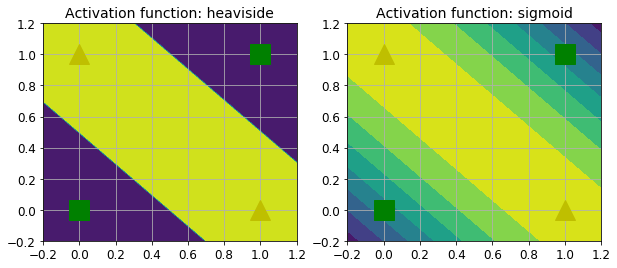

In [7]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

## Training an MLP with TensorFlow's High-Level API
## using tf.learn

- TF.Learn의 DNN Classifier 클래스는 hidden layer 와 softmax output layer을 쉽게 만들어준다.
- (예제) DNN 2개 hiedden layers(각각 300개, 100개 뉴런)과 1개의 output layer (10개 뉴런) 

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


In [9]:
X_train = mnist.train.images
X_test = mnist.test.images
y_train = mnist.train.labels.astype("int")
y_test = mnist.test.labels.astype("int")

In [10]:
import tensorflow as tf

config = tf.contrib.learn.RunConfig(tf_random_seed=42) # not shown in the config

feature_cols = tf.contrib.learn.infer_real_valued_columns_from_input(X_train)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                         feature_columns=feature_cols, config=config)
dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # if TensorFlow >= 1.1
dnn_clf.fit(X_train, y_train, batch_size=50, steps=40000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x131f1e7b8>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': None}
Instructions for updating:
Please switch to tf.summary.scalar. Note that tf.summary.scalar uses the node name instead of the tag. This means that TensorFlow will automatically de-duplicate summary names based on the scope they are created in. Also, passing a tensor or list of tags to a scalar summary op is no longer supported.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/rz/

INFO:tensorflow:loss = 0.0136699, step = 6901 (0.497 sec)
INFO:tensorflow:global_step/sec: 202.245
INFO:tensorflow:loss = 0.0266123, step = 7001 (0.495 sec)
INFO:tensorflow:global_step/sec: 199.101
INFO:tensorflow:loss = 0.00661904, step = 7101 (0.502 sec)
INFO:tensorflow:global_step/sec: 202.827
INFO:tensorflow:loss = 0.0382335, step = 7201 (0.493 sec)
INFO:tensorflow:global_step/sec: 202.557
INFO:tensorflow:loss = 0.00938992, step = 7301 (0.494 sec)
INFO:tensorflow:global_step/sec: 203.639
INFO:tensorflow:loss = 0.0176395, step = 7401 (0.491 sec)
INFO:tensorflow:global_step/sec: 195.016
INFO:tensorflow:loss = 0.00269845, step = 7501 (0.513 sec)
INFO:tensorflow:global_step/sec: 193.946
INFO:tensorflow:loss = 0.0172509, step = 7601 (0.515 sec)
INFO:tensorflow:global_step/sec: 191.295
INFO:tensorflow:loss = 0.00714039, step = 7701 (0.523 sec)
INFO:tensorflow:global_step/sec: 142.613
INFO:tensorflow:loss = 0.00676612, step = 7801 (0.702 sec)
INFO:tensorflow:global_step/sec: 166.55
INFO:t

INFO:tensorflow:loss = 0.0021394, step = 15101 (0.480 sec)
INFO:tensorflow:global_step/sec: 203.087
INFO:tensorflow:loss = 0.00143217, step = 15201 (0.492 sec)
INFO:tensorflow:global_step/sec: 199.888
INFO:tensorflow:loss = 0.00144085, step = 15301 (0.500 sec)
INFO:tensorflow:global_step/sec: 204.679
INFO:tensorflow:loss = 0.00202756, step = 15401 (0.489 sec)
INFO:tensorflow:global_step/sec: 201.838
INFO:tensorflow:loss = 0.00536905, step = 15501 (0.495 sec)
INFO:tensorflow:global_step/sec: 205.521
INFO:tensorflow:loss = 0.00482624, step = 15601 (0.487 sec)
INFO:tensorflow:global_step/sec: 205.731
INFO:tensorflow:loss = 0.00891734, step = 15701 (0.488 sec)
INFO:tensorflow:global_step/sec: 203.733
INFO:tensorflow:loss = 0.000380861, step = 15801 (0.489 sec)
INFO:tensorflow:global_step/sec: 203.752
INFO:tensorflow:loss = 0.00026086, step = 15901 (0.491 sec)
INFO:tensorflow:global_step/sec: 206.343
INFO:tensorflow:loss = 0.00497545, step = 16001 (0.485 sec)
INFO:tensorflow:global_step/sec

INFO:tensorflow:global_step/sec: 212.618
INFO:tensorflow:loss = 0.00193569, step = 23301 (0.470 sec)
INFO:tensorflow:global_step/sec: 215.841
INFO:tensorflow:loss = 0.000460001, step = 23401 (0.463 sec)
INFO:tensorflow:global_step/sec: 213.692
INFO:tensorflow:loss = 0.000577636, step = 23501 (0.468 sec)
INFO:tensorflow:global_step/sec: 212.73
INFO:tensorflow:loss = 0.000578934, step = 23601 (0.470 sec)
INFO:tensorflow:global_step/sec: 208.771
INFO:tensorflow:loss = 0.0004731, step = 23701 (0.479 sec)
INFO:tensorflow:global_step/sec: 216.412
INFO:tensorflow:loss = 0.00126306, step = 23801 (0.462 sec)
INFO:tensorflow:global_step/sec: 213.3
INFO:tensorflow:loss = 0.00167757, step = 23901 (0.469 sec)
INFO:tensorflow:global_step/sec: 218.115
INFO:tensorflow:loss = 0.000704214, step = 24001 (0.458 sec)
INFO:tensorflow:global_step/sec: 214.19
INFO:tensorflow:loss = 0.000718476, step = 24101 (0.467 sec)
INFO:tensorflow:global_step/sec: 216.438
INFO:tensorflow:loss = 0.00186048, step = 24201 (0

INFO:tensorflow:global_step/sec: 206.469
INFO:tensorflow:loss = 0.000548003, step = 31401 (0.484 sec)
INFO:tensorflow:global_step/sec: 207.133
INFO:tensorflow:loss = 0.000182311, step = 31501 (0.483 sec)
INFO:tensorflow:global_step/sec: 205.94
INFO:tensorflow:loss = 0.000157721, step = 31601 (0.485 sec)
INFO:tensorflow:global_step/sec: 202.618
INFO:tensorflow:loss = 0.000687681, step = 31701 (0.494 sec)
INFO:tensorflow:global_step/sec: 206.572
INFO:tensorflow:loss = 0.000149343, step = 31801 (0.484 sec)
INFO:tensorflow:global_step/sec: 204.137
INFO:tensorflow:loss = 0.000716847, step = 31901 (0.490 sec)
INFO:tensorflow:global_step/sec: 206.224
INFO:tensorflow:loss = 0.000197099, step = 32001 (0.485 sec)
INFO:tensorflow:global_step/sec: 208.016
INFO:tensorflow:loss = 0.00020142, step = 32101 (0.481 sec)
INFO:tensorflow:global_step/sec: 207.333
INFO:tensorflow:loss = 0.000950564, step = 32201 (0.482 sec)
INFO:tensorflow:global_step/sec: 206.616
INFO:tensorflow:loss = 0.000478452, step = 

INFO:tensorflow:global_step/sec: 216.486
INFO:tensorflow:loss = 0.000210663, step = 39501 (0.462 sec)
INFO:tensorflow:global_step/sec: 213.909
INFO:tensorflow:loss = 0.000567543, step = 39601 (0.467 sec)
INFO:tensorflow:global_step/sec: 208.815
INFO:tensorflow:loss = 9.82609e-05, step = 39701 (0.479 sec)
INFO:tensorflow:global_step/sec: 211.068
INFO:tensorflow:loss = 0.00067276, step = 39801 (0.474 sec)
INFO:tensorflow:global_step/sec: 214.259
INFO:tensorflow:loss = 0.000958653, step = 39901 (0.467 sec)
INFO:tensorflow:Saving checkpoints for 40000 into /var/folders/rz/pq7kq6qn5k757n49mq6f4gth0000gn/T/tmpateyigox/model.ckpt.
INFO:tensorflow:Loss for final step: 0.000424012.


SKCompat()

In [11]:
from sklearn.metrics import accuracy_score

y_pred = dnn_clf.predict(X_test)
accuracy_score(y_test, y_pred['classes'])

INFO:tensorflow:Restoring parameters from /var/folders/rz/pq7kq6qn5k757n49mq6f4gth0000gn/T/tmpateyigox/model.ckpt-40000


0.98250000000000004

In [12]:
from sklearn.metrics import log_loss # to evaluate

y_pred_proba = y_pred['probabilities']
log_loss(y_test, y_pred_proba)

0.073724042319017094

## Training a DNN Using Plain TensorFlow
## Using plain TensorFlow

- Minibatch Gradient Descent 를 이용해 MNIST 데이터를 학습시켜 보자.
 - Construction phase: building the TensorFlow gratph
 - Execution phase: actually run the graph to train the model

### Construction Phase

In [13]:
import tensorflow as tf

n_inputs = 28*28  # MNIST
n_hidden1 = 300 # num. of hidden neurons in each layer
n_hidden2 = 100 
n_outputs = 10 

- placeholder nodes: trainig data와 target을 나타내자
 -  batch_size, 입력 형태와 트레이닝 data의 입력 형태를 정의
 - images_placeholder = tf.placeholder(<kbd>tf.float32</kbd>, shape=(<kbd>batch_size</kbd>, <kbd>mnist.IMAGE_PIXELS</kbd>))

In [14]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")# represent training data
y = tf.placeholder(tf.int64, shape=(None), name="y") # represent target

- X의 모양은 부분적으로 만 정의된다.
- 첫 번째 차원의 인스턴스와 두 번째 차원의 피쳐를 가진 2D 텐서 (즉, 행렬)가 될 것이며, 피쳐의 수는 28 x 28 (픽셀 당 하나의 피쳐)이 될 것이라는 것을 알고 있습니다. 하지만 각 훈련 배치에 몇 개의 인스턴스가 포함되는지는 아직 알 수 없습니다. 그래서 X의 모양은 (None, n_inputs)이다. 
- 마찬가지로 y는 인스턴스 당 하나의 엔트리를 가진 1D 텐서가되지만이 시점에서 트레이닝 배치의 크기를 알 수 없기 때문에 모양은 (없음)이다.

- 이제 실제 신경망을 만들어 보겠습니다. 자리 표시 자 X는 입력 레이어의 역할을 한다.
- 실행 단계에서 한 번에 하나의 학습 배치마다 대체됩니다 (학습 배치의 모든 인스턴스는 신경 네트워크에 의해 동시에 처리된다). ☆
- 이제 두 개의 숨겨진 레이어와 출력 레이어를 만들자.
- 두 개의 숨겨진 레이어는 거의 동일합니다. 연결되어있는 입력과 포함 된 뉴런의 수에 따라 다르다.
- 출력 계층도 매우 유사하지만 ReLU 활성화 기능 대신 softmax 활성화 기능을 사용한다. 
- neuron_layer () 함수를 만들어서 한번에 여러개의 레이어를 만들자. 입력, 뉴런 수, 활성화 함수 및 레이어 이름을 지정하는 매개 변수가 필요하다.

In [15]:
def neuron_layer(X, n_neurons, name, activation=None):  # neuron layer를 만드는 함수
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal((n_inputs, n_neurons), stddev=stddev)
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

1. 먼저 레이어의 이름을 사용하여 name scope를 만든다.이 뉴런 레이어에는 필요한 모든 계산 노드가 포함된다. 선택 사항이지만 노드가 잘 구성되어 있으면 그래프가 TensorBoard에서 훨씬 더 멋지게 보입니다. 
2. 다음으로, 입력 수를 얻는데, 입력 행렬의 모양을 찾아 두 번째 차원의 크기를 가져 온다.  (첫 번째 차원은 인스턴스 용입니다). 
3. 다음 세 줄은 가중치 행렬을 보유 할 W 변수를 작성한다. 각 입력과 각 뉴런 사이의 모든 연결 가중치를 포함하는 2D 텐서가 된다. 따라서 그 모양은 (n_inputs, n_neurons)가 된다. 표준 편차가 2 / ninputs 인 truncated normal (Gaussian) 분포를 사용하여 무작위로 초기화됩니다. 이 특정 표준 편차를 사용하면 알고리즘이 훨씬 빨리 수렴하는 데 도움이 된다 (이는 신경 네트워크의 효율성에 엄청난 영향을 끼친 작은 조정 중 하나). 경사 하강 알고리즘이 대칭문제를 피하기 위해 모든 숨겨진 레이어에 대해 연결 가중치를 임의로 초기화하는 것이 중요하다 . 
4. 다음 줄은 0으로 초기화 되는 bias  b 변수를 만듭니다 (여기서는 대칭 문제 없음) 각 뉴런 당 하나의 바이어스 매개 변수가 있다. 
5. 그런 다음 z = X · W + b를 계산하기 위한 부분 그래프를 만든다. 이 벡터화 된 구현은 배치의 모든 인스턴스에 대해서 레이어와 뉴런 각각 입력의 가중치 합계와 바이어스 합을 효율적으로 계산한다.
6. 마지막으로 활성화 매개 변수가 "relu"로 설정된 경우 코드에서 relu (z) (즉, max (0, z))를 반환하거나 아니면 z를 반환한다.

In [16]:
with tf.name_scope("dnn"):  # deep neural network를 만들자
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1",  # 첫번째 hidden layer에서는 X를 input으로 받는다.
                           activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2",  # hidden1을 ouput을 input으로 받는다.
                           activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs") # ouput layer에서는 hidden2을 ouput을 input으로 받는다.

- 명확하게 보기 위해 name scope를 사용했다. 
- logits는 softmax 활성화 함수를 거치기 전에 신경망의 출력입니다. 최적화를 위해 나중에 softmax 계산은 나중에 처리 할 것입니다.

In [17]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
                                                              logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

- 이제 우리는 신경망 모델을 사용할 준비가되었습니다. 우리는 이를 훈련시키는 데 사용할 Cost Function을 정의해야 한다.
- 교차 엔트로피는 목표 클래스에 대해 낮은 확률로 추정하는 모델에 불이익을 준다. TensorFlow는 교차 엔트로피를 계산하는 몇 가지 기능을 제공하는데, 우리는 `sparse_soft max_cross_entropy_with_logits ()`를 사용한다.
- `sparse_soft max_cross_entropy_with_logits ()`: "logits"(즉, softmax 활성화 함수를 거치기 전에 네트워크의 출력)를 기반으로 크로스 엔트로피를 계산합니다. 0에서부터 클래스 수 - 1 (우리의 경우 0에서 9)개의 라벨링을 한다. 이것은 각 인스턴스 마다 교차 엔트로피를 포함하는 1D 텐서를 출력한다. 이때 TensorFlow의 `reduce_mean ()` 함수를 사용하여 모든 인스턴스에 대한 평균 교차 엔트로피를 계산할 수 있다.
> `sparse_softmax_cross_entropy_with_logits ()` 함수는 softmax 활성화 함수를 적용한 다음 크로스 엔트로피를 계산하는 것과 동일하지만보다 효율적이며 logits = 0 과 같은 사례를 적절하게 처리합니다. 따라서 softmax 활성화를 적용하지 않았다.
`softmax_cross_entropy_with_logits ()`라는 또 다른 함수는 이 함수는 one-hot 벡터의 형태로 레이블을 취합니다 (int에서 0에서 클래스 수 빼기 대신)

신경망모델, 비용함수를 정의했으니, 비용 함수를 최소화하기 위해 모델 매개 변수를 조정할 `GradientDescentOptimizer`을 정의하자

In [18]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

- 구축 단계의 마지막 중요한 단계는 모델 평가 방법을 지정하는 것이다. 여기서는 단순히 성능 척도로서 정확도를 사용한다.
- 첫째, 각 인스턴스에 대해 가장 높은 logit 값이 target 클래스에 해당하는지 여부를 확인하여 신경망의 예측이 올바른지 확인한다. 
- 이를 위해 in_top_k () 함수를 사용하자. 부울 값으로 가득 찬 1D 텐서를 반환하므로써 부울을 부동 소수점 형으로 캐스팅 한 다음 평균을 계산해야한다. 이렇게하면 네트워크의 전체적인 정확성을 얻을 수 있다.

In [19]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))
    accuracy_summary = tf.summary.scalar('accuracy', accuracy)

평소처럼 모든 변수를 초기화하는 노드를 만들어야하며, 훈련 된 모델 매개 변수를 디스크에 저장하는 `Saver`도 만들자.

In [20]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

입력 및 대상에 대한 place holder을 만들었고, 신경 층을 만드는 함수를 만들고 DNN을 만드는 데 사용했으며, 비용 함수를 정의했다. 최적화 도구를 만들고 마지막으로 성능 측정 값을 정의했습니다. 이제 실행 단계로 넘어가자

### Execution Phase

- MNIST를 로드를(ScikitLearn 대신) TensorFlow로 데이터를 가져 와서 크기를 조정하고 (0에서 1 사이), 셔플 링하고. 한 번에 하나의 미니 배치를 로드하는 간단한 함수를 제공하니 이용해보자

In [21]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/")

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


- 실행하려는 에포크의 수와 미니 배치의 크기를 정의하자

In [22]:
n_epochs = 40
batch_size = 50

- 학습을 시키자

- 이 코드는 TensorFlow 세션을 열고 모든 변수를 초기화하는 init 노드를 실행한다. 그런 다음 기본 학습 루프를 실행한다. 
- 각 에포크마다 코드는 학습 데이터 세트 크기에 해당하는 미니 배치를 반복 수행 한다. 
- 각 미니 배치는 next_batch () 메소드를 통해 가져오고 코드는 학습 작업을 실행하면서, 현재 미니 배치 입력 데이터와 target을 제공한다.
- 다음으로, 마지막 에포크에서, 코드는 마지막 미니 배치와 전체 학습 세트에서 모델을 평가하고 결과를 출력한다.
- 마지막으로 모델 매개 변수가 디스크에 저장된다.

In [ ]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images,
                                            y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

### Using the Neural Network
- nn을 학습시켰으니, 이제 예측하는데 써먹어보자
- 동일한 구성 단계를 재사용 할 수 있지만, 다음과 같이 실행 단계 아래와 같이 변경시켜보자

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt") # or better, use save_path
    X_new_scaled = mnist.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

- 먼저 디스크에서 모델 매개 변수를 로드하자.
- 그런 다음 분류 할 새 이미지를로드합니다. 
- 교육 데이터의 경우와 feature scaling 을 적용해야 한다. (이 경우 크기를 0에서 1로 조정). 그런 다음 코드는 logits 노드를 평가합니다. 
- 모든 예상 클래스 확률을 알고 싶다면 softmax () 함수를 logits에 적용해야하지만,
 - argmax () 함수를 수행함으로써 클래스를 예측하려는 경우 가장 높은 logit 값을 가진 클래스를 선택할 수 있다. 

In [ ]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", mnist.test.labels[:20])

In [ ]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [ ]:
show_graph(tf.get_default_graph())

## Fine-Tuning Neural Network Hyperparameters
- randomized search
- Oscar 

### Number of Hidden Layers
- 깊은 네트워크는 얕은 네트워크보다 파라미터 효율성이 훨씬 높다. 얕은 네트워크보다 지수 함수 적으로 더 적은 뉴런을 사용하여 복잡한 함수를 모델링 할 수 있으므로 학습이 훨씬 빨라졌습니다.

### Number of Neurons per Hidden Layer

### Activation Functions

## Using dense() instead of neuron_layer()
Note: the book uses tensorflow.contrib.layers.fully_connected() rather than tf.layers.dense() (which did not exist when this chapter was written). It is now preferable to use tf.layers.dense(), because anything in the contrib module may change or be deleted without notice. The dense() function is almost identical to the fully_connected() function, except for a few minor differences:
several parameters are renamed: scope becomes name, activation_fn becomes activation (and similarly the _fn suffix is removed from other parameters such as normalizer_fn), weights_initializer becomes kernel_initializer, etc.
the default activation is now None rather than tf.nn.relu.
a few more differences are presented in chapter 11.

In [ ]:
n_inputs = 28*28  # MNIST
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [ ]:
reset_graph()

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

In [ ]:
with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, name="hidden1",
                              activation=tf.nn.relu)
    hidden2 = tf.layers.dense(hidden1, n_hidden2, name="hidden2",
                              activation=tf.nn.relu)
    logits = tf.layers.dense(hidden2, n_outputs, name="outputs")

In [ ]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [ ]:
learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [ ]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [ ]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [ ]:
n_epochs = 20
n_batches = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for iteration in range(mnist.train.num_examples // batch_size):
            X_batch, y_batch = mnist.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: mnist.test.images, y: mnist.test.labels})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./my_model_final.ckpt")

In [ ]:
show_graph(tf.get_default_graph())